In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime
plt.style.use(style="seaborn")
%matplotlib inline

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf

In [4]:
aapl= yf.Ticker("aapl")
aapl

yfinance.Ticker object <AAPL>

In [5]:
# Define the stock symbols for the financial institutions we're interested in
stock_symbols = ['AAPL', 'KO', 'NKE', 'EA']
# Define the start and end dates for our data
start_date = '2020-01-01'
end_date = '2024-02-28'

# Function to download stock data
def download_stock_data(symbols):
    data = {}
    for symbol in symbols:
        data[symbol] = yf.download(symbol, start=start_date, end=end_date)
    return data

# Download stock data
stocks_data = download_stock_data(stock_symbols)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [6]:
# Display the first few rows of Apple's stock data
print(stocks_data['AAPL'].tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-02-21  181.940002  182.889999  180.660004  182.320007  182.320007   
2024-02-22  183.479996  184.960007  182.460007  184.369995  184.369995   
2024-02-23  185.009995  185.039993  182.229996  182.520004  182.520004   
2024-02-26  182.240005  182.759995  180.649994  181.160004  181.160004   
2024-02-27  181.100006  183.919998  179.559998  182.630005  182.630005   

              Volume  
Date                  
2024-02-21  41529700  
2024-02-22  52292200  
2024-02-23  45074500  
2024-02-26  40867400  
2024-02-27  54318900  


In [7]:
df = stocks_data['AAPL']

In [8]:
# We only use the close feature.

In [9]:
df = df[["Adj Close"]]

In [10]:
type(df["Adj Close"]) == type(df[["Adj Close"]])

False

In [11]:
type(df[["Adj Close"]])

pandas.core.frame.DataFrame

In [12]:
df.describe()

,Adj Close
count,1045.000000
mean,140.974064
std,34.224975
min,54.706993
25%,122.621574
50%,145.057571
75%,168.286865
max,197.857529


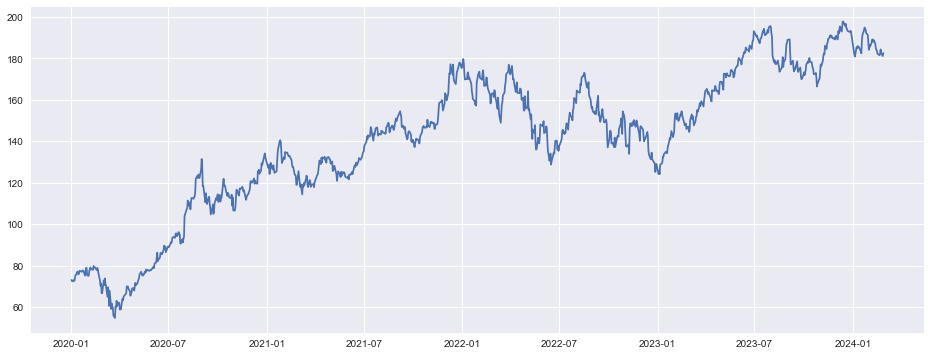

In [13]:
plt.figure(1, figsize=(16, 6))
_ = plt.plot(df['Adj Close'])

In [14]:
#Calculate the percentage change for stationarity

In [15]:
df.loc[:, "Returns"] = df['Adj Close'].pct_change()

C:\Users\jbren\anaconda3\envs\PythonData2\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [16]:
df["Returns"] = df['Adj Close'].pct_change()

C:\Users\jbren\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df.head(5)

,Adj Close,Returns
Date,,
2020-01-02,73.059433,NaN
2020-01-03,72.349129,-0.009722
2020-01-06,72.925652,0.007969
2020-01-07,72.582657,-0.004703
2020-01-08,73.750229,0.016086


In [18]:
7.656 / 7.643 - 1

0.001700902786863745

In [19]:
#Calculate log returns.

In [20]:
df["Log_Returns"] = np.log(1 + df["Returns"])

C:\Users\jbren\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df.head(5)

,Adj Close,Returns,Log_Returns
Date,,,
2020-01-02,73.059433,NaN,NaN
2020-01-03,72.349129,-0.009722,-0.009770
2020-01-06,72.925652,0.007969,0.007937
2020-01-07,72.582657,-0.004703,-0.004714
2020-01-08,73.750229,0.016086,0.015958


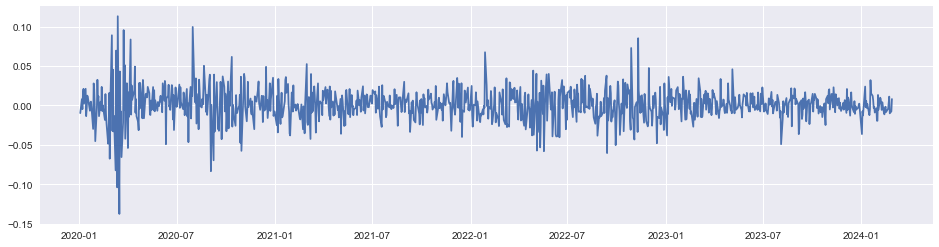

In [22]:
plt.figure(1, figsize=(16, 4))
plt.plot(df.Log_Returns)

In [23]:
df.dropna(inplace=True)
X = df[["Adj Close", "Log_Returns"]].values

C:\Users\jbren\anaconda3\envs\PythonData2\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [24]:
X

array([[ 7.23491287e+01, -9.76984989e-03],
       [ 7.29256516e+01,  7.93703976e-03],
       [ 7.25826569e+01, -4.71444317e-03],
       ...,
       [ 1.82520004e+02, -1.00848021e-02],
       [ 1.81160004e+02, -7.47914056e-03],
       [ 1.82630005e+02,  8.08163604e-03]])

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
X_scaled = scaler.transform(X)

In [27]:
X_scaled[:5]

array([[0.12324184, 0.50998731],
       [0.12726923, 0.58057068],
       [0.12487319, 0.53013922],
       [0.13302944, 0.61254427],
       [0.14397266, 0.63271632]])

In [28]:
y = [x[0] for x in X_scaled]

In [29]:
y[:5]

[0.1232418415216266,
 0.1272692300661295,
 0.12487318810552267,
 0.13302944135826272,
 0.14397266496498679]

In [30]:
#Train Test Split

In [31]:
split = int(len(X_scaled) * 0.8)
print(split)

835


In [32]:
X_train = X_scaled[:split]
X_test = X_scaled[split : len(X_scaled)]
y_train = y[:split]
y_test = y[split : len(y)]

In [33]:
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

In [34]:
#Labeling the Time Series using the Time Step for 3 Days

In [35]:
n = 3
Xtrain = []
ytrain = []
Xtest = []
ytest = []
for i in range(n, len(X_train)):
    Xtrain.append(X_train[i - n : i, : X_train.shape[1]])
    ytrain.append(y_train[i]) # predict next record
for i in range(n, len(X_test)):
    Xtest.append(X_test[i - n : i, : X_test.shape[1]])
    ytest.append(y_test[i]) #predict next record
    

In [36]:
df.head(5)

,Adj Close,Returns,Log_Returns
Date,,,
2020-01-03,72.349129,-0.009722,-0.009770
2020-01-06,72.925652,0.007969,0.007937
2020-01-07,72.582657,-0.004703,-0.004714
2020-01-08,73.750229,0.016086,0.015958
2020-01-09,75.316757,0.021241,0.021019


In [37]:
Xtrain[0]

array([[0.12324184, 0.50998731],
       [0.12726923, 0.58057068],
       [0.12487319, 0.53013922]])

In [38]:
ytrain[0]

0.13302944135826272

In [39]:
val = np.array(ytrain[0])
val = np.c_[val, np.zeros(val.shape)]

In [40]:
scaler.inverse_transform(val)

array([[73.75022888, -0.13770776]])

In [41]:
#In LSTM Network - input for each layer must contain # of observations, time steps, and features.

In [42]:
Xtrain, ytrain = (np.array(Xtrain), np.array(ytrain))
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))

Xtest, ytest = (np.array(Xtest), np.array(ytest))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], Xtest.shape[2]))

In [43]:
print(Xtrain.shape)
print(ytrain.shape)
print("---")
print(Xtest.shape)
print(ytest.shape)

(832, 3, 2)
(832,)
---
(206, 3, 2)
(206,)


In [44]:
#LSTM Model

In [45]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [46]:
model = Sequential()
model.add(LSTM(4, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(
    Xtrain, ytrain, epochs=100, validation_data=(Xtest, ytest), batch_size=16, verbose=1
)

Epoch 1/100
52/52 [==============================] - 5s 27ms/step - loss: 0.0218 - val_loss: 0.0021
Epoch 2/100
52/52 [==============================] - 0s 6ms/step - loss: 7.9614e-04 - val_loss: 0.0018
Epoch 3/100
52/52 [==============================] - 0s 6ms/step - loss: 6.4074e-04 - val_loss: 9.6347e-04
Epoch 4/100
52/52 [==============================] - 0s 6ms/step - loss: 5.7405e-04 - val_loss: 9.0144e-04
Epoch 5/100
52/52 [==============================] - 0s 6ms/step - loss: 5.3129e-04 - val_loss: 7.0413e-04
Epoch 6/100
52/52 [==============================] - 0s 6ms/step - loss: 5.1103e-04 - val_loss: 5.9259e-04
Epoch 7/100
52/52 [==============================] - 0s 6ms/step - loss: 5.0270e-04 - val_loss: 5.7115e-04
Epoch 8/100
52/52 [==============================] - 0s 7ms/step - loss: 5.0122e-04 - val_loss: 5.1755e-04
Epoch 9/100
52/52 [==============================] - 0s 6ms/step - loss: 5.0049e-04 - val_loss: 5.7051e-04
Epoch 10/100
52/52 [============================

52/52 [==============================] - 0s 8ms/step - loss: 3.6935e-04 - val_loss: 2.9867e-04
Epoch 78/100
52/52 [==============================] - 0s 6ms/step - loss: 3.6931e-04 - val_loss: 4.6303e-04
Epoch 79/100
52/52 [==============================] - 0s 6ms/step - loss: 3.6386e-04 - val_loss: 3.0815e-04
Epoch 80/100
52/52 [==============================] - 0s 6ms/step - loss: 3.7739e-04 - val_loss: 5.6325e-04
Epoch 81/100
52/52 [==============================] - 0s 6ms/step - loss: 3.6799e-04 - val_loss: 4.3430e-04
Epoch 82/100
52/52 [==============================] - 0s 6ms/step - loss: 3.8033e-04 - val_loss: 7.0984e-04
Epoch 83/100
52/52 [==============================] - 0s 6ms/step - loss: 3.7783e-04 - val_loss: 6.1357e-04
Epoch 84/100
52/52 [==============================] - 0s 6ms/step - loss: 3.7784e-04 - val_loss: 4.9085e-04
Epoch 85/100
52/52 [==============================] - 0s 6ms/step - loss: 3.7657e-04 - val_loss: 4.0881e-04
Epoch 86/100
52/52 [=====================

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 112       
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [48]:
trainPredict = model.predict(Xtrain)
testPredict = model.predict(Xtest)

7/7 [==============================] - 1s 4ms/step


In [49]:
trainPredict = np.c_[trainPredict, np.zeros(trainPredict.shape)]
testPredict = np.c_[testPredict, np.zeros(testPredict.shape)]

In [50]:
#invert predictions

In [51]:
trainPredict = scaler.inverse_transform(trainPredict)
trainPredict = [x[0] for x in trainPredict]

testPredict = scaler.inverse_transform(testPredict)
testPredict = [x[0] for x in testPredict]

In [52]:
print(trainPredict[:5])
print(testPredict[:5])

[72.43739682093292, 73.47794668946369, 74.72882539189641, 75.08489251295123, 76.6117934134943]
[166.1976402848818, 165.26074459198435, 163.67627107397902, 171.25485825197575, 169.81365288066308]


In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
# calculate root mean squared error
trainScore = mean_squared_error([x[0][0] for x in Xtrain], trainPredict, squared=False)
print("Train Score: %.2f RMSE" % (trainScore))

testScore = mean_squared_error([x[0][0] for x in Xtest], testPredict, squared=False)
print("Test Score: %.2f RMSE" % (testScore))

Train Score: 132.82 RMSE
Test Score: 179.16 RMSE
